# Producing interactive plots from different data sources

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

from ipywidgets import interact, IntSlider, SelectionSlider, Dropdown
from IPython.display import display


# Saildrone data

In [104]:
#Example nc file of Saildrone data from OpenDAP (similar code could be used for IMOS gliders)
ncfile = 'https://podaac-opendap.jpl.nasa.gov/opendap/hyrax/allData/insitu/L2/saildrone/Baja/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1.nc'
ds = xr.open_dataset(ncfile)
ds = ds.squeeze()

ds


<xarray.Dataset>
Dimensions:               (obs: 86839)
Coordinates:
    trajectory            float32 1.002e+03
    time                  (obs) datetime64[ns] ...
    latitude              (obs) float64 ...
    longitude             (obs) float64 ...
Dimensions without coordinates: obs
Data variables: (12/41)
    SOG                   (obs) float64 ...
    COG                   (obs) float64 ...
    HDG                   (obs) float64 ...
    HDG_WING              (obs) float64 ...
    ROLL                  (obs) float64 ...
    PITCH                 (obs) float64 ...
    ...                    ...
    CHLOR_MEAN            (obs) float64 ...
    CHLOR_STDDEV          (obs) float64 ...
    CDOM_MEAN             (obs) float64 ...
    CDOM_STDDEV           (obs) float64 ...
    BKSCT_RED_MEAN        (obs) float64 ...
    BKSCT_RED_STDDEV      (obs) float64 ...
Attributes: (12/34)
    title:                     Baja 2018 Near-Real-Time Mission Data
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3
    netcdf_version:            4.4.1.1
    featureType:               trajectory
    cdm_data_type:             Trajectory
    ...                        ...
    geospatial_lon_max:        -115.5226624
    geospatial_lon_units:      degrees_east
    area:                      Baja California Coast
    project:                   baja_2018
    product_version:           1
    summary:                   The Saildrone unmanned surface vehicle (USV) c...

In [105]:
varnames = list(ds.data_vars.keys())
nvar = len(varnames) 

def plot_var(variable):
    plt.figure(figsize=[10, 4])
    ds[variable].plot(x="time")

interact(plot_var,variable=Dropdown(options=varnames), continuous_update=False);

interactive(children=(Dropdown(description='variable', options=('SOG', 'COG', 'HDG', 'HDG_WING', 'ROLL', 'PITC…

In [106]:
def plot_track(variable):
    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={"projection": ccrs.PlateCarree()})
    cs = xr.plot.scatter(ds, 'longitude', 'latitude', c = ds[variable], s=8)
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True)
    cb = plt.colorbar(cs,shrink = 0.75)
    cb.set_label(label=str(ds[variable].attrs['units']),fontsize=20)
interact(plot_track,variable=Dropdown(options=varnames), continuous_update=False);

interactive(children=(Dropdown(description='variable', options=('SOG', 'COG', 'HDG', 'HDG_WING', 'ROLL', 'PITC…

# IMOS Mooring Data

In [107]:
import intake

cat =intake.open_catalog('./catalogue.yml')
rotto =cat.rottnest.read()

In [108]:
rotto

<xarray.Dataset>
Dimensions:     (TIME: 25483, DEPTH: 61, LONGITUDE: 2, LATITUDE: 2)
Coordinates:
  * TIME        (TIME) datetime64[ns] 1951-04-17T12:00:00 ... 2021-01-21T12:0...
  * DEPTH       (DEPTH) int32 0 1 2 3 4 5 6 7 8 9 ... 52 53 54 55 56 57 58 59 60
  * LONGITUDE   (LONGITUDE) float32 115.3 115.5
  * LATITUDE    (LATITUDE) float32 -32.08 -31.93
Data variables:
    TIME_GRID   (DEPTH, TIME) datetime64[ns] 1951-04-17T12:00:00 ... 2021-01-...
    TEMP_GRID   (DEPTH, TIME) float32 22.4 22.36 22.34 22.31 ... nan nan nan nan
    DEPTH_GRID  (DEPTH, TIME) float32 0.0 0.0 0.0 0.0 ... 60.0 60.0 60.0 60.0
Attributes: (12/35)
    date_created:                  2022-03-31T23:45:44Z
    title:                         Rottnest Island 55 m Daily 1m gridded temp...
    abstract:                      Rottnest Island 55 m Gridded Data Product:...
    Conventions:                   CF-1.6, IMOS-1.4
    acknowledgement:               Any users of IMOS data are required to cle...
    citation:                      Roughan, M. et al. Multi-decadal ocean tem...
    ...                            ...
    distribution_statement:        Data may be re-used, provided that related...
    license:                       http://creativecommons.org/licenses/by/4.0/
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    naming_authority:              IMOS
    time_coverage_start:           1951-04-17T12:00:00Z
    time_coverage_end:             2021-01-21T12:00:00Z

In [109]:
import hvplot.xarray 

Visualize sea water temperature at a given depth as a function of time

In [110]:
temp = rotto.TEMP_GRID 
temp.hvplot(x='TIME')

:DynamicMap   [DEPTH]
   :Curve   [TIME]   (TEMP_GRID)

Visualize annual mean temp at any given depth over time

In [111]:
annual_temp = rotto.TEMP_GRID.load().resample(TIME='1Y').mean()

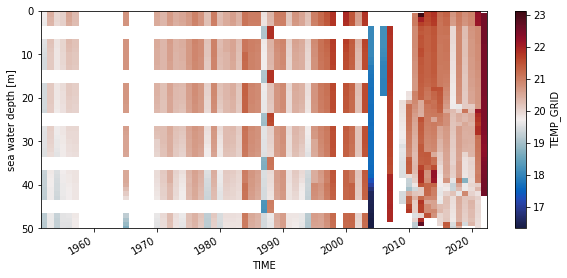

In [112]:
import cmocean.cm as cmo

plt.figure(figsize=[10,4])
annual_temp.plot(ylim=[50,0], cmap = cmo.balance)

In [113]:
#next step: make this interactive; select any given year to look at monthly avg temp
#produce similar plot but with temp anomalie